In [1]:
from qiskit import QuantumCircuit, Aer, assemble
import numpy as np
from qiskit.visualization import plot_histogram, plot_bloch_multivector

In [2]:
qc = QuantumCircuit(3)
# Apply H-gate to each qubit:
for qubit in range(3):
    qc.h(qubit)
# See the circuit:
qc.draw()

┌───┐
q_0: ┤ H ├
     ├───┤
q_1: ┤ H ├
     ├───┤
q_2: ┤ H ├
     └───┘

In [3]:
# Let's see the result
svsim = Aer.get_backend('aer_simulator')
qc.save_statevector()
qobj = assemble(qc)
final_state = svsim.run(qobj).result().get_statevector()

# In Jupyter Notebooks we can display this nicely using Latex.
# If not using Jupyter Notebooks you may need to remove the 
# array_to_latex function and use print(final_state) instead.
from qiskit.visualization import array_to_latex
array_to_latex(final_state, prefix="\\text{Statevector} = ")

<IPython.core.display.Latex object>

In [4]:
qc = QuantumCircuit(2)
qc.h(0)
qc.x(1)
qc.draw()

┌───┐
q_0: ┤ H ├
     ├───┤
q_1: ┤ X ├
     └───┘

In [5]:
usim = Aer.get_backend('aer_simulator')
qc.save_unitary()
qobj = assemble(qc)
unitary = usim.run(qobj).result().get_unitary()

In [6]:
# In Jupyter Notebooks we can display this nicely using Latex.
# If not using Jupyter Notebooks you may need to remove the 
# array_to_latex function and use print(unitary) instead.
from qiskit.visualization import array_to_latex
array_to_latex(unitary, prefix="\\text{Circuit = }\n")

<IPython.core.display.Latex object>

In [7]:
qc = QuantumCircuit(2)
qc.x(1)
qc.draw()

q_0: ─────
     ┌───┐
q_1: ┤ X ├
     └───┘

In [8]:
# Simulate the unitary
usim = Aer.get_backend('aer_simulator')
qc.save_unitary()
qobj = assemble(qc)
unitary = usim.run(qobj).result().get_unitary()
# Display the results:
array_to_latex(unitary, prefix="\\text{Circuit = } ")

<IPython.core.display.Latex object>

In [9]:
qc = QuantumCircuit(2)
# Apply CNOT
qc.cx(0,1)
# See the circuit:
qc.draw()

q_0: ──■──
     ┌─┴─┐
q_1: ┤ X ├
     └───┘

In [10]:
qc = QuantumCircuit(2)
# Apply H-gate to the first:
qc.h(0)
qc.draw()

┌───┐
q_0: ┤ H ├
     └───┘
q_1: ─────

In [11]:
# Let's see the result:
svsim = Aer.get_backend('aer_simulator')
qc.save_statevector()
qobj = assemble(qc)
final_state = svsim.run(qobj).result().get_statevector()
# Print the statevector neatly:
array_to_latex(final_state, prefix="\\text{Statevector = }")

<IPython.core.display.Latex object>

In [12]:
qc = QuantumCircuit(2)
# Apply H-gate to the first:
qc.h(0)
# Apply a CNOT:
qc.cx(0,1)
qc.draw()

┌───┐     
q_0: ┤ H ├──■──
     └───┘┌─┴─┐
q_1: ─────┤ X ├
          └───┘

In [13]:
# Let's get the result:
qc.save_statevector()
qobj = assemble(qc)
result = svsim.run(qobj).result()
# Print the statevector neatly:
final_state = result.get_statevector()
array_to_latex(final_state, prefix="\\text{Statevector = }")

<IPython.core.display.Latex object>

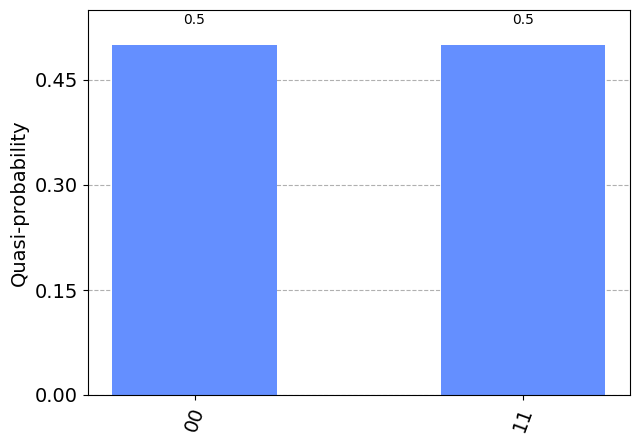

In [14]:
plot_histogram(result.get_counts())

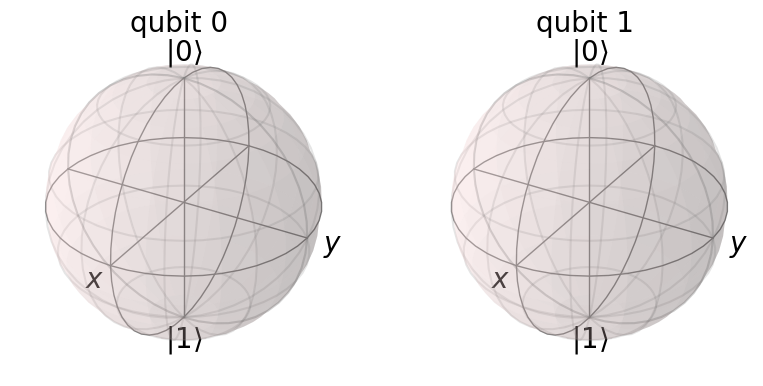

In [15]:
plot_bloch_multivector(final_state)

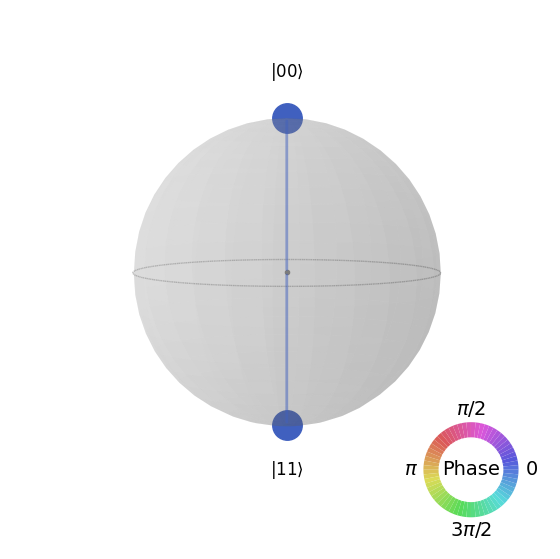

In [16]:
from qiskit.visualization import plot_state_qsphere
plot_state_qsphere(final_state)

In [ ]:
import qiskit.tools.jupyter
%qiskit_version_table